# Chicago Crime Analysis and Prediction Part I: Analysis
## Analysis of the Chicago Crime Data Set 2001-2018
###### Data found at https://www.kaggle.com/currie32/crimes-in-chicago

### Preliminary Actions

In [0]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading data from 2001-2004, 2005-2007, 2008-2011, 2012-2017

In [0]:
datato2004 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
datato2004.head()

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [0]:
datato2007 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
datato2007.head()

b'Skipping line 533719: expected 23 fields, saw 24\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [0]:
datato2011 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
datato2011.head()

b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,388,4785,HP610824,10/07/2008 12:39:00 PM,000XX E 75TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,...,6.0,69.0,01A,1178207.0,1855308.0,2008,08/17/2015 03:03:40 PM,41.758276,-87.622451,"(41.758275857, -87.622451031)"
1,835,4786,HP616595,10/09/2008 03:30:00 AM,048XX W POLK ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,24.0,25.0,01A,1144200.0,1895857.0,2008,08/17/2015 03:03:40 PM,41.870252,-87.746069,"(41.87025207, -87.746069362)"
2,1334,4787,HP616904,10/09/2008 08:35:00 AM,030XX W MANN DR,0110,HOMICIDE,FIRST DEGREE MURDER,PARK PROPERTY,False,...,18.0,66.0,01A,1157314.0,1859778.0,2008,08/17/2015 03:03:40 PM,41.770990,-87.698901,"(41.770990476, -87.698901469)"
3,1907,4788,HP618616,10/10/2008 02:33:00 AM,052XX W CHICAGO AVE,0110,HOMICIDE,FIRST DEGREE MURDER,RESTAURANT,False,...,37.0,25.0,01A,1141065.0,1904824.0,2008,08/17/2015 03:03:40 PM,41.894917,-87.757358,"(41.894916924, -87.757358147)"
4,2436,4789,HP619020,10/10/2008 12:50:00 PM,026XX S HOMAN AVE,0110,HOMICIDE,FIRST DEGREE MURDER,GARAGE,False,...,22.0,30.0,01A,1154123.0,1886297.0,2008,08/17/2015 03:03:40 PM,41.843826,-87.709893,"(41.843826272, -87.709893465)"


In [0]:
datato2017 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)
datato2017.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Concatenate Data Vertically

In [0]:
concat_data = pd.concat([datato2004, datato2007, datato2011, datato2017], axis=0)
concat_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


## Remove Columns with Too Many Null Values

In [0]:
rel_data = concat_data[['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Location Description',
                       'Arrest','Ward','Community Area','FBI Code','Year','Updated On']]
rel_data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
0,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,7.0,46.0,06,2004.0,08/17/2015 03:03:40 PM
1,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,11.0,61.0,26,2003.0,04/15/2016 08:55:02 AM
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,35.0,22.0,20,2004.0,08/17/2015 03:03:40 PM
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,31.0,20.0,06,2004.0,08/17/2015 03:03:40 PM
4,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,34.0,49.0,06,2003.0,04/15/2016 08:55:02 AM
5,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,24.0,29.0,06,2004.0,08/17/2015 03:03:40 PM
6,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,9.0,50.0,02,2001.0,08/29/2006 03:46:28 AM
7,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,21.0,73.0,26,2003.0,04/15/2016 08:55:02 AM
8,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,42.0,8.0,06,2004.0,08/17/2015 03:03:40 PM
9,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,24.0,29.0,06,2003.0,04/15/2016 08:55:02 AM


## Crime Type

In [0]:
"""Count How Many Instances of Each CrimeType"""
crime_type = pd.value_counts(rel_data['Primary Type'].values)
crime_type

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

## Plot Bar Chart of Crime Types

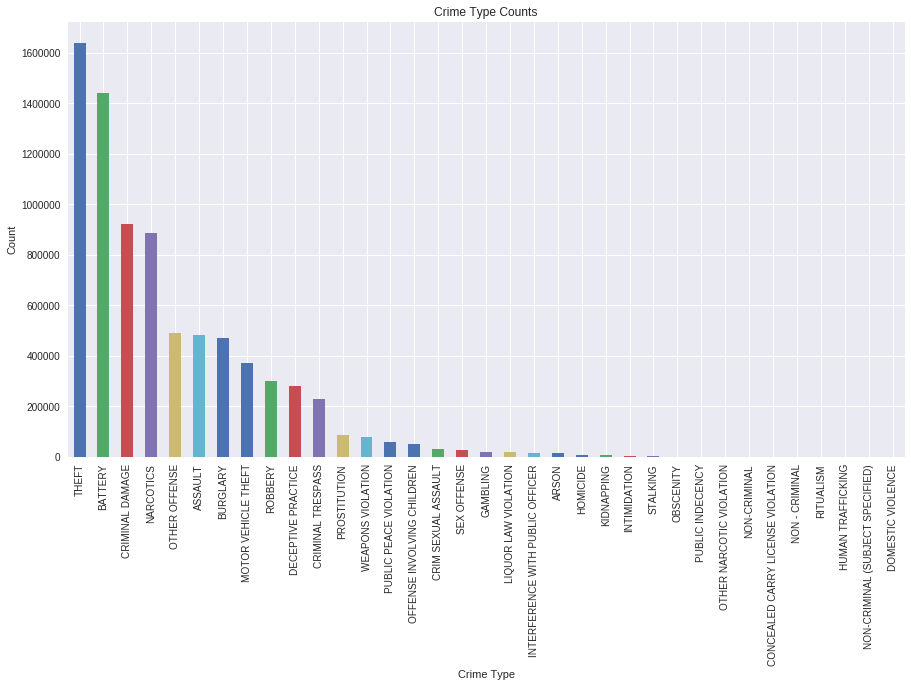

In [0]:
"""Plot a Bar Chart"""
plt.figure(figsize=(15,8))
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Crime Type Counts')
crime_type.plot.bar()

## Location Type

In [0]:
"""Count How Many Instances of Each Location Type"""
location_type = pd.value_counts(rel_data['Location Description'].values)
location_type

STREET                            2101842
RESIDENCE                         1341749
SIDEWALK                           815595
APARTMENT                          812512
OTHER                              294286
PARKING LOT/GARAGE(NON.RESID.)     225454
ALLEY                              180155
SCHOOL, PUBLIC, BUILDING           173750
RESIDENCE-GARAGE                   158550
RESIDENCE PORCH/HALLWAY            138492
SMALL RETAIL STORE                 134003
VEHICLE NON-COMMERCIAL             128311
RESTAURANT                         116295
GROCERY FOOD STORE                 100812
DEPARTMENT STORE                    95201
GAS STATION                         82396
RESIDENTIAL YARD (FRONT/BACK)       75442
CHA PARKING LOT/GROUNDS             65124
PARK PROPERTY                       61322
COMMERCIAL / BUSINESS OFFICE        58200
CTA PLATFORM                        44710
CHA APARTMENT                       41550
BAR OR TAVERN                       41169
DRUG STORE                        

In [0]:
#The above value counts makes a crowded bar chart.  Let's convert it to a data frame for easier visualization.
df_location_type = pd.DataFrame(location_type)
loc_type = df_location_type.head(30)
loc_type

,0
STREET,2101842
RESIDENCE,1341749
SIDEWALK,815595
APARTMENT,812512
OTHER,294286
PARKING LOT/GARAGE(NON.RESID.),225454
ALLEY,180155
"SCHOOL, PUBLIC, BUILDING",173750
RESIDENCE-GARAGE,158550
RESIDENCE PORCH/HALLWAY,138492


In [0]:
loc_type.columns = ["Count"]
loc_type

,Count
STREET,2101842
RESIDENCE,1341749
SIDEWALK,815595
APARTMENT,812512
OTHER,294286
PARKING LOT/GARAGE(NON.RESID.),225454
ALLEY,180155
"SCHOOL, PUBLIC, BUILDING",173750
RESIDENCE-GARAGE,158550
RESIDENCE PORCH/HALLWAY,138492


In [0]:
loc_type.reset_index(inplace=True)
loc_type

,index,Count
0,STREET,2101842
1,RESIDENCE,1341749
2,SIDEWALK,815595
3,APARTMENT,812512
4,OTHER,294286
5,PARKING LOT/GARAGE(NON.RESID.),225454
6,ALLEY,180155
7,"SCHOOL, PUBLIC, BUILDING",173750
8,RESIDENCE-GARAGE,158550
9,RESIDENCE PORCH/HALLWAY,138492


## Plot Bar Chart of Location Types

Text(0, 0.5, 'Count')

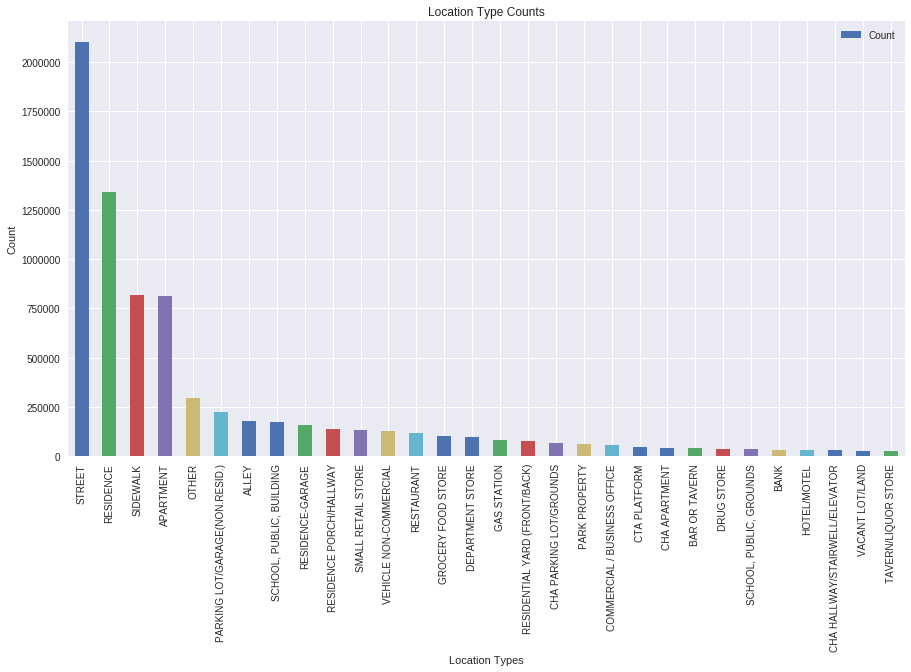

In [0]:
"""Plot a Bar Chart"""

loc_bar = loc_type.plot(x='index', y='Count', kind='bar', figsize=(15,8), title="Location Type Counts")
loc_bar.set_xlabel('Location Types')
loc_bar.set_ylabel('Count')

## Year

In [0]:
rel_data['Year'] = rel_data['Year'].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
"""Count How Many Instances of Crime in Each Year"""
year = pd.value_counts(rel_data['Year'].values)
year

2008    852053
2006    794684
2009    783900
2010    700691
2007    621848
2001    568517
2002    490879
2003    475913
2005    455811
2004    388205
2011    352066
2012    335670
2013    306703
2014    274527
2016    265462
2015    262995
2017     11357
41           1
dtype: int64

## Plot Bar Chart of Crime Incidents by Year

Text(0, 0.5, 'Count')

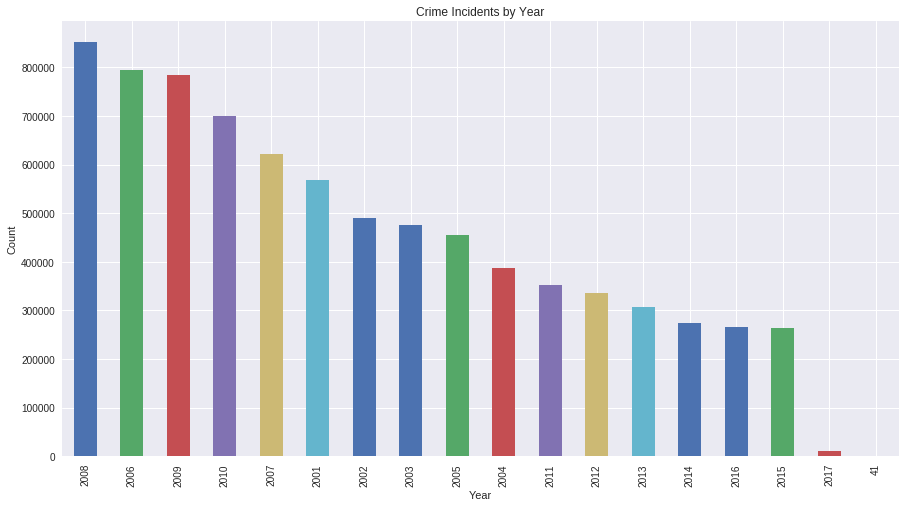

In [0]:
"""Plot a Bar Chart"""
year_bar = year.plot.bar(figsize=(15,8), title = 'Crime Incidents by Year')
year_bar.set_xlabel('Year')
year_bar.set_ylabel('Count')

####  Crime is going down. Yay.

## Cross Tabulate to Get Another Look at the Data

In [0]:
crimes_time = rel_data[['Primary Type','Year']]

In [0]:
cross = pd.crosstab(crimes_time['Primary Type'], crimes_time['Year'])

cross = pd.DataFrame(cross)
cross.head()

Year,41,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Primary Type,,,,,,,,,,,,,,,,,,
ARSON,0,1177,1042,957,652,693,1292,1030,1288,1231,1012,506,469,364,399,451,521,13
ASSAULT,0,36439,31846,29438,23694,27138,45737,37851,50852,45695,41229,20453,19898,17971,16896,17040,18710,774
BATTERY,0,108601,94933,88315,71689,84219,142354,114990,151711,136827,124840,60537,59132,54003,49444,48904,50243,1974
BURGLARY,0,30218,25789,25145,20750,25577,43068,34833,52405,53485,49670,26621,22844,17894,14569,13183,14240,667
CONCEALED CARRY LICENSE VIOLATION,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,34,36,5


### Add a "Totals" Column

In [0]:
cross['Totals'] = cross.sum(axis=1)

cross.head()

Year,41,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Totals
Primary Type,,,,,,,,,,,,,,,,,,,
ARSON,0,1177,1042,957,652,693,1292,1030,1288,1231,1012,506,469,364,399,451,521,13,13097
ASSAULT,0,36439,31846,29438,23694,27138,45737,37851,50852,45695,41229,20453,19898,17971,16896,17040,18710,774,481661
BATTERY,0,108601,94933,88315,71689,84219,142354,114990,151711,136827,124840,60537,59132,54003,49444,48904,50243,1974,1442716
BURGLARY,0,30218,25789,25145,20750,25577,43068,34833,52405,53485,49670,26621,22844,17894,14569,13183,14240,667,470958
CONCEALED CARRY LICENSE VIOLATION,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,34,36,5,90


In [0]:
cross.sort_values('Totals', ascending=False)

Year,41,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Totals
Primary Type,,,,,,,,,,,,,,,,,,,
THEFT,0,115887,99074,99069,81365,86400,152292,118863,176635,161815,144397,75249,75454,71524,61530,57292,61167,2493,1640506
BATTERY,0,108601,94933,88315,71689,84219,142354,114990,151711,136827,124840,60537,59132,54003,49444,48904,50243,1974,1442716
CRIMINAL DAMAGE,1,65050,56353,54991,43903,54684,100257,76367,105519,95387,77701,37332,35853,30853,27797,28669,30978,1305,923000
NARCOTICS,0,59900,52206,54224,44270,56349,103819,78346,92662,86995,82790,38630,35486,34144,28953,23833,12413,411,885431
OTHER OFFENSE,0,35538,32901,31078,24236,28168,47291,38882,52977,51165,41614,20198,17480,17984,16962,17534,17040,874,491922
ASSAULT,0,36439,31846,29438,23694,27138,45737,37851,50852,45695,41229,20453,19898,17971,16896,17040,18710,774,481661
BURGLARY,0,30218,25789,25145,20750,25577,43068,34833,52405,53485,49670,26621,22844,17894,14569,13183,14240,667,470958
MOTOR VEHICLE THEFT,0,32082,25249,22734,18859,22574,37817,26623,37707,30942,35434,19389,16492,12582,9913,10076,11363,712,370548
ROBBERY,0,21504,18632,17322,13528,16085,28328,21507,33387,31930,26930,13987,13484,11819,9798,9639,11960,613,300453


## A Visualization of Different Crimes over time

In [0]:
# Recall relevant data
rel_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
0,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,7.0,46.0,06,2004,08/17/2015 03:03:40 PM
1,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,11.0,61.0,26,2003,04/15/2016 08:55:02 AM
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,35.0,22.0,20,2004,08/17/2015 03:03:40 PM
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,31.0,20.0,06,2004,08/17/2015 03:03:40 PM
4,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,34.0,49.0,06,2003,04/15/2016 08:55:02 AM


In [0]:
combo = rel_data[['Primary Type', 'Year']]
combo.head()

,Primary Type,Year
0,THEFT,2004
1,OTHER OFFENSE,2003
2,OFFENSE INVOLVING CHILDREN,2004
3,THEFT,2004
4,THEFT,2003


In [0]:
combo.groupby('Primary Type')['Year'].value_counts()

Primary Type       Year
ARSON              2006      1292
                   2008      1288
                   2009      1231
                   2001      1177
                   2002      1042
                   2007      1030
                   2010      1012
                   2003       957
                   2005       693
                   2004       652
                   2016       521
                   2011       506
                   2012       469
                   2015       451
                   2014       399
                   2013       364
                   2017        13
ASSAULT            2008     50852
                   2006     45737
                   2009     45695
                   2010     41229
                   2007     37851
                   2001     36439
                   2002     31846
                   2003     29438
                   2005     27138
                   2004     23694
                   2011     20453
                   2012 

### Create plot of top five crimes over time

In [0]:
# Create arrays of data to plot
years = [2001,2002,2003,2004,2005,2006,2007,2008,2009, 2010,2011,2012,2013,2014,2015,2016,2017]
theft_counts = [115887,99074,99069,81365,86400,152292,118863,176635,161815,144397,75249,75454,71524,61530,57292,61167,2493]
battery_counts = [108601,94933,88315,71689,84219,142354,114990,151711,136827,124840,60537,59132,54003,49444,48904,50243,1974]
criminal_damage_counts = [65050,56353,54991,43903,54684,100257,76367,105519,95387,77701,37332,35853,30853,27797,28669,30978,1305]
narcotics_counts = [59900,52206,54224,44270,56349,103819,78346,92662,86995,82790,38630,35486,34144,28953,23833,12413,411]
other_counts = [35538,32901,31078,24236,28168,47291,38882,52977,51165,41614,20198,17480,17984,16962,17534,17040,874]


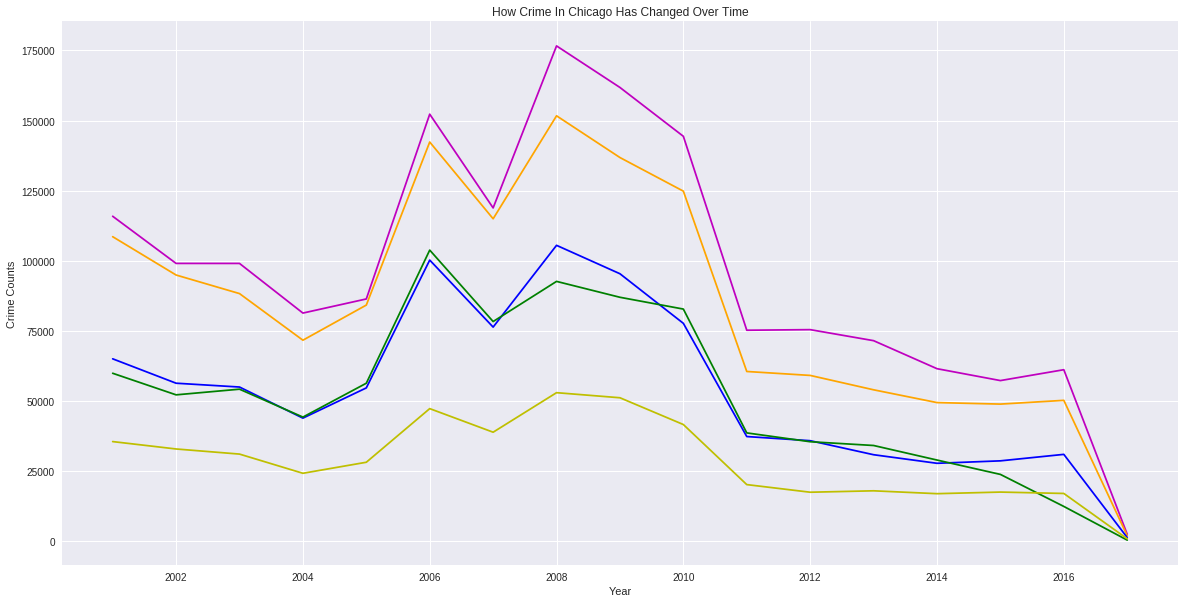

In [0]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(years, theft_counts, color='m')
plt.plot(years, battery_counts, color='orange')
plt.plot(years, criminal_damage_counts, color='b')
plt.plot(years, narcotics_counts, color='g')
plt.plot(years, other_counts, color='y')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.title('How Crime In Chicago Has Changed Over Time')
plt.show()